In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random as rand

# Problem 1

## Translate the following pseudocode into Python code. 

![Probelm1](ex1.jpg "Probelm 1")

Where $\rho = \frac{1}{\sqrt{2\pi\beta}} \cdot e^{\frac{(x - x')^2}{2\beta}}$

In [1]:
def density(x1,x2,beta):
    return 1/(np.sqrt(2*np.pi*beta)) * np.exp(-((x1-x2.reshape(-1,1))**2)/(2*beta))

In [2]:
def harmonic(x,beta,k):
    return np.exp(-(1/2)*beta*k*x) * density(x,x,beta) * np.exp(-(1/2)*beta*k*x)

In [4]:
x = np.linspace(0,1,1000)
beta = 0.01
k = .005
dx = x[1]-x[0]
h = harmonic(x,beta,k)

Now we can square h and multiply it by dx to get the solution. Plot it as an image for 5 iterations of the matrix squaring.

If you do everything correctly, you should see a Gaussian distribution.

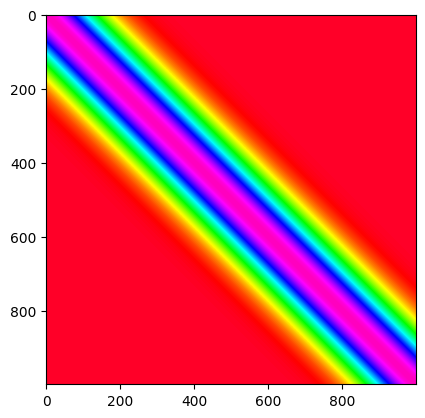

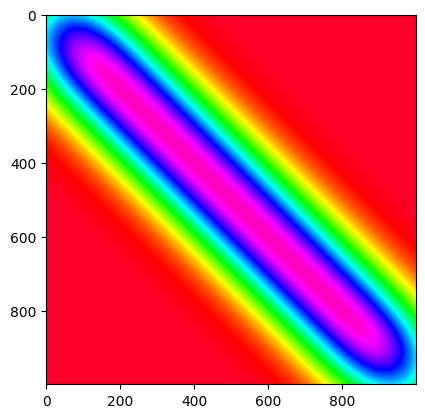

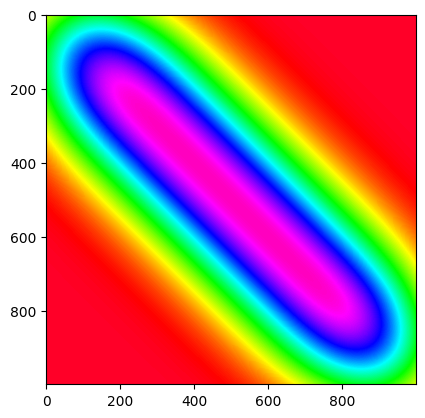

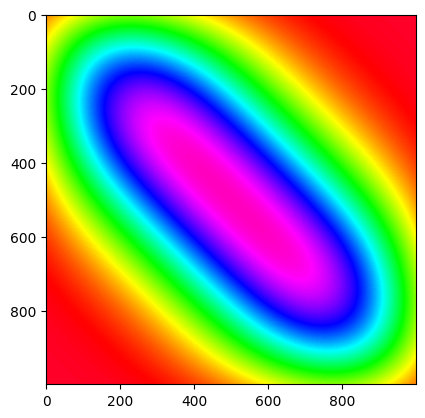

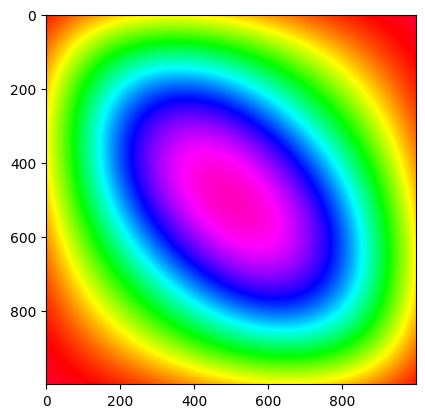

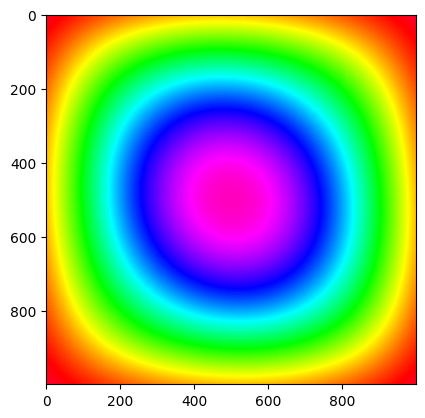

In [5]:
for i in range(5):
    plt.imshow(h)
    plt.show()
    h = dx * (h@h)
plt.imshow(h)
plt.show()

# Problem 2

## Translate the following pseudocode into Python code.

![Probelm2](ex2.jpg "Probelm 2")

In [6]:
def rho(x0,x1,beta):
    return 1/(np.sqrt(2*np.pi*beta)) * np.exp(-((x0-x1) ** 2)/(2*beta))

In [7]:
def randomeWalk(x,beta,d=0.1):
    N = len(x)
    dt = beta/N
    k = np.random.randint(0, N-2)
    k1 = k+1
    k2 = k-1
    if k2 == -1: 
        k2 = N-1
    xk1 = x[k] + rand.uniform(-d, d)
    pia = rho(x[k2], x[k], dt) * rho(x[k], x[k1], dt) * np.exp(-0.5 * dt * x[k] **2)
    pib = rho(x[k2], xk1, dt) * rho(xk1, x[k1], dt) * np.exp(-0.5 * dt * xk1 **2)
    if rand.uniform(0,1) < pib/pia:
        x[k] = xk1
    return x

In [8]:
x = np.linspace(0,1,1000)
beta = 4
d = 0.1
for i in tqdm(range(1000000)):
    x = randomeWalk(x,beta,d)

  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [00:41<00:00, 24266.01it/s]


Now we plot the histogram of x. If we have done everything correctly, it should look like a Gaussian distribution.

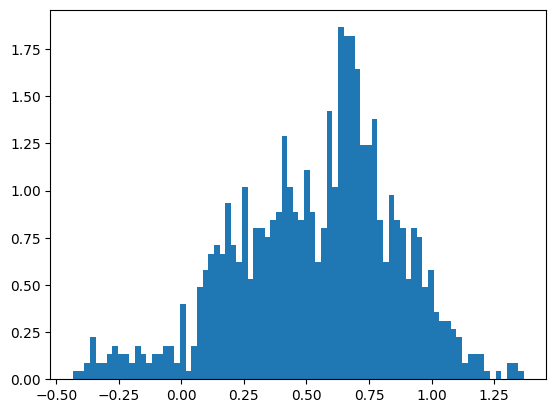

In [9]:
plt.hist(x,bins=80, density=True)
plt.show()